# Big Data Mart Sales Problem -

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df1 = pd.read_csv(r'C:\Users\HP\Desktop\bigdatamart_Test.csv')
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
bigmart = pd.concat([df, df1],ignore_index=True) # Merged both Datasets for further process
print(df.shape, df1.shape, bigmart.shape)

(8523, 12) (5681, 11) (14204, 12)


In [5]:
bigmart1=bigmart.drop(['Item_Identifier','Outlet_Establishment_Year'],axis=1) # Removing the columns which are not needed

In [6]:
bigmart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           11765 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_Type             14204 non-null  object 
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           10188 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(6)
memory usage: 1.1+ MB


In [7]:
bigmart1.isnull().sum()

Item_Weight             2439
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
dtype: int64

In [8]:
bigmart1.apply(lambda x: len(x.unique()))

Item_Weight               416
Item_Fat_Content            5
Item_Visibility         13006
Item_Type                  16
Item_MRP                 8052
Outlet_Identifier          10
Outlet_Size                 4
Outlet_Location_Type        3
Outlet_Type                 4
Item_Outlet_Sales        3494
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Item_Fat_Content']=LE.fit_transform(bigmart1['Item_Fat_Content'])
bigmart1['Item_Fat_Content'].value_counts()

1    8485
2    4824
0     522
4     195
3     178
Name: Item_Fat_Content, dtype: int64

In [10]:
LE.inverse_transform([0,1,2,3,4])

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Item_Type']=LE.fit_transform(bigmart1['Item_Type'])
bigmart1['Item_Type'].value_counts()

6     2013
13    1989
9     1548
5     1426
4     1136
0     1086
3     1084
8      858
10     736
14     726
1      416
7      362
11     280
15     269
2      186
12      89
Name: Item_Type, dtype: int64

In [12]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Outlet_Identifier']=LE.fit_transform(bigmart1['Outlet_Identifier'])
bigmart1['Outlet_Identifier'].value_counts()

5    1559
1    1553
8    1550
9    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet_Identifier, dtype: int64

In [14]:
LE.inverse_transform([0,1,2,3,4,5,6,7,8,9])

array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Outlet_Size']=LE.fit_transform(bigmart1['Outlet_Size'])
bigmart1['Outlet_Size'].value_counts()

1    4655
3    4016
2    3980
0    1553
Name: Outlet_Size, dtype: int64

In [16]:
LE.inverse_transform([0,1,2,3])

array(['High', 'Medium', 'Small', nan], dtype=object)

In [17]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Outlet_Location_Type']=LE.fit_transform(bigmart1['Outlet_Location_Type'])
bigmart1['Outlet_Location_Type'].value_counts()

2    5583
1    4641
0    3980
Name: Outlet_Location_Type, dtype: int64

In [18]:
LE.inverse_transform([0,1,2])

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bigmart1['Outlet_Type']=LE.fit_transform(bigmart1['Outlet_Type'])
bigmart1['Outlet_Type'].value_counts()

1    9294
0    1805
3    1559
2    1546
Name: Outlet_Type, dtype: int64

In [20]:
LE.inverse_transform([0,1,2,3])

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

In [21]:
# Imputing Missing Values

In [22]:
bigmart1['Item_Weight'] = bigmart1['Item_Weight'].fillna(bigmart1['Item_Weight'].mean())

In [23]:
bigmart1['Outlet_Size'] = bigmart1['Outlet_Size'].fillna(bigmart1['Outlet_Size'].mode()[0])

In [24]:
bigmart1['Item_Outlet_Sales'] = bigmart1['Item_Outlet_Sales'].fillna(bigmart1['Item_Outlet_Sales'].mean())

In [25]:
bigmart1.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
Item_Outlet_Sales       0
dtype: int64

In [26]:
bigmart1.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,1.369121,0.065953,7.229372,141.004977,4.722473,1.736342,1.112856,1.201281,2181.288914
std,4.234226,0.643300,0.051459,4.213471,62.086938,2.837101,0.989119,0.812755,0.796543,1321.864430
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,9.300000,1.000000,0.027036,4.000000,94.012000,2.000000,1.000000,0.000000,1.000000,1468.089000
50%,12.792854,1.000000,0.054021,6.000000,142.247000,5.000000,2.000000,1.000000,1.000000,2181.288914
75%,16.000000,2.000000,0.094037,10.000000,185.855600,7.000000,3.000000,2.000000,1.000000,2181.288914
max,21.350000,4.000000,0.328391,15.000000,266.888400,9.000000,3.000000,2.000000,3.000000,13086.964800


In [27]:
# Checking Correlation
bigmart1.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Weight,1.000000,-0.027387,-0.013641,0.028637,0.033002,0.003274,-0.001556,-0.002104,0.001699,0.008569
Item_Fat_Content,-0.027387,1.000000,0.033864,-0.121140,-0.006195,-0.001733,-0.004608,-0.002518,-0.002380,0.007609
Item_Visibility,-0.013641,0.033864,1.000000,-0.035646,-0.006351,-0.106181,0.089297,-0.017362,-0.165726,-0.099903
Item_Type,0.028637,-0.121140,-0.035646,1.000000,0.043948,0.001126,-0.001554,0.002083,0.004305,0.013194
Item_MRP,0.033002,-0.006195,-0.006351,0.043948,1.000000,-0.000555,-0.000835,0.000838,0.000136,0.440979
Outlet_Identifier,0.003274,-0.001733,-0.106181,0.001126,-0.000555,1.000000,0.053157,-0.716151,0.099899,0.125742
Outlet_Size,-0.001556,-0.004608,0.089297,-0.001554,-0.000835,0.053157,1.000000,-0.290188,-0.432092,-0.133610
Outlet_Location_Type,-0.002104,-0.002518,-0.017362,0.002083,0.000838,-0.716151,-0.290188,1.000000,0.467251,0.069224
Outlet_Type,0.001699,-0.002380,-0.165726,0.004305,0.000136,0.099899,-0.432092,0.467251,1.000000,0.310989
Item_Outlet_Sales,0.008569,0.007609,-0.099903,0.013194,0.440979,0.125742,-0.133610,0.069224,0.310989,1.000000


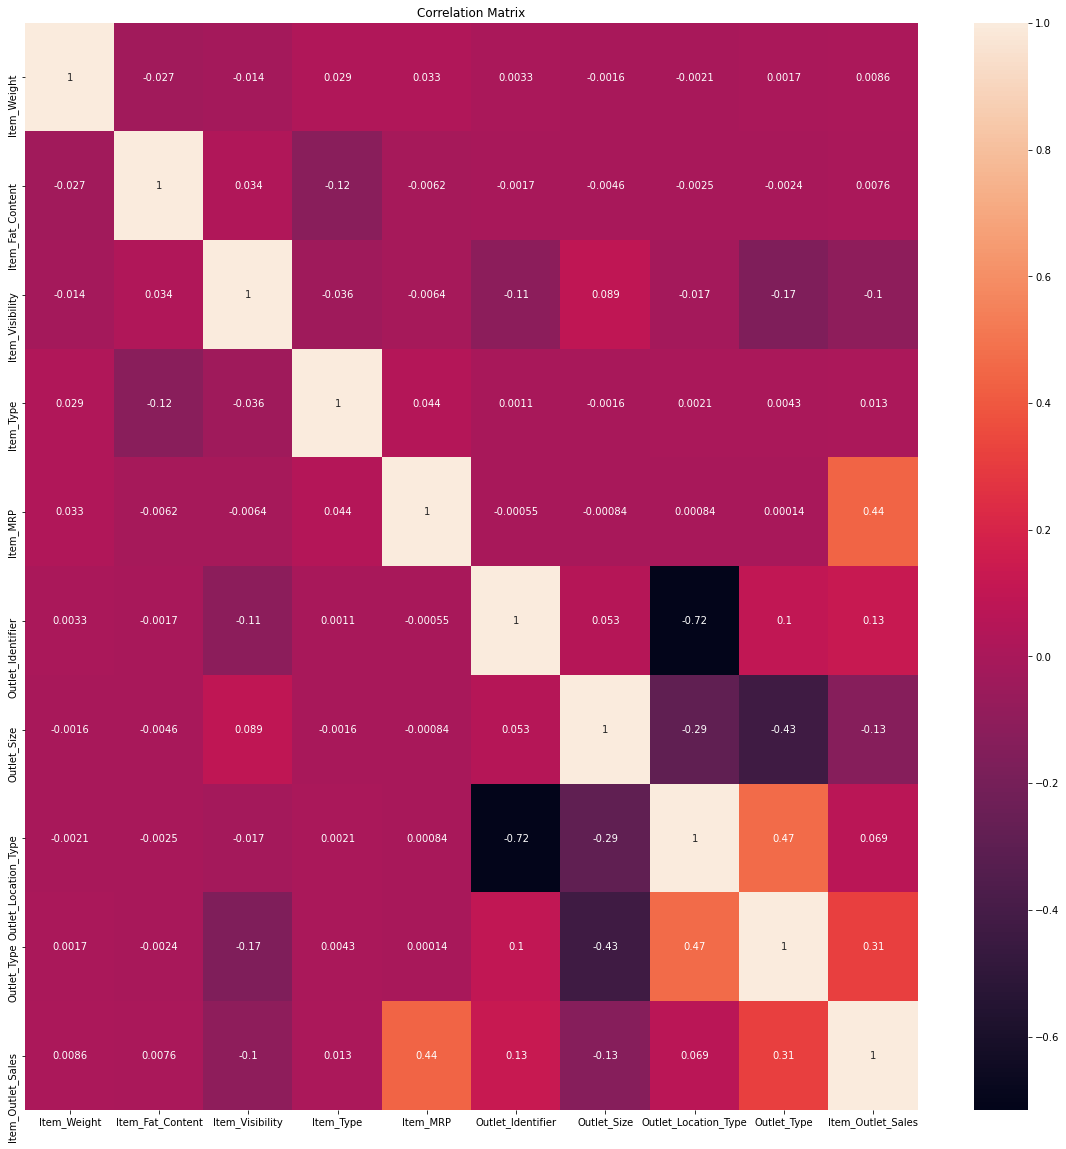

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
corr_mat=bigmart1.corr()
# Size of the canvas
plt.figure(figsize=[20,20])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

In [29]:
# Check the data distribution among all comlumns

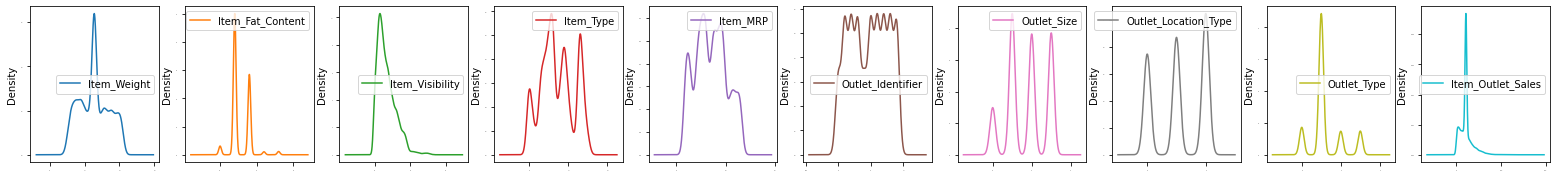

In [30]:
bigmart1.plot(kind='density',subplots=True,layout=(6,11),sharex=False,fontsize=1,figsize=(30,20))
plt.show()

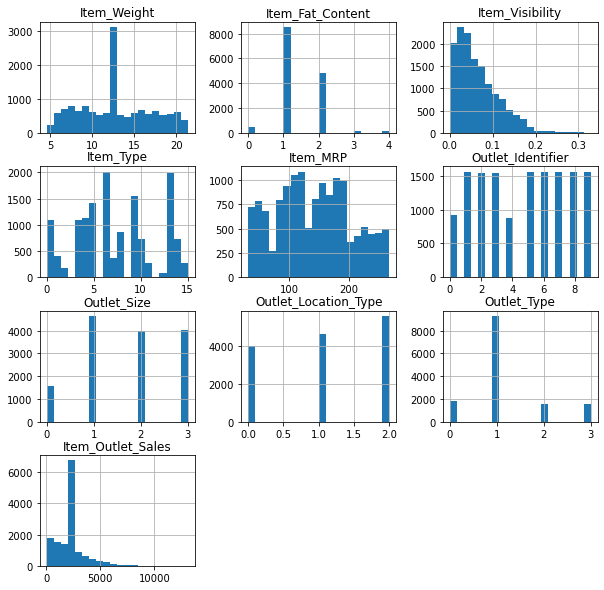

In [31]:
#plot histogram data vizualization
bigmart1.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()

In [32]:
# Checking Skweness
bigmart1.skew().sort_values(ascending=False) # For descending 

Item_Outlet_Sales       1.520025
Item_Visibility         1.195175
Item_Fat_Content        0.996640
Outlet_Type             0.927344
Item_MRP                0.130728
Item_Weight             0.111314
Item_Type               0.099574
Outlet_Identifier      -0.059994
Outlet_Size            -0.131825
Outlet_Location_Type   -0.209053
dtype: float64

In [33]:
# Remove the Skweness of the data
from sklearn.preprocessing import power_transform
bigmart_new=power_transform(bigmart1)
bigmart1=pd.DataFrame(bigmart_new,columns=bigmart1.columns)

In [34]:
bigmart1.skew().sort_values(ascending=False) # For descending 

Item_Visibility         0.121332
Item_Outlet_Sales       0.066681
Item_Fat_Content        0.032645
Outlet_Type             0.007849
Item_Weight            -0.065230
Item_MRP               -0.113637
Outlet_Size            -0.150843
Item_Type              -0.165700
Outlet_Identifier      -0.213964
Outlet_Location_Type   -0.220613
dtype: float64

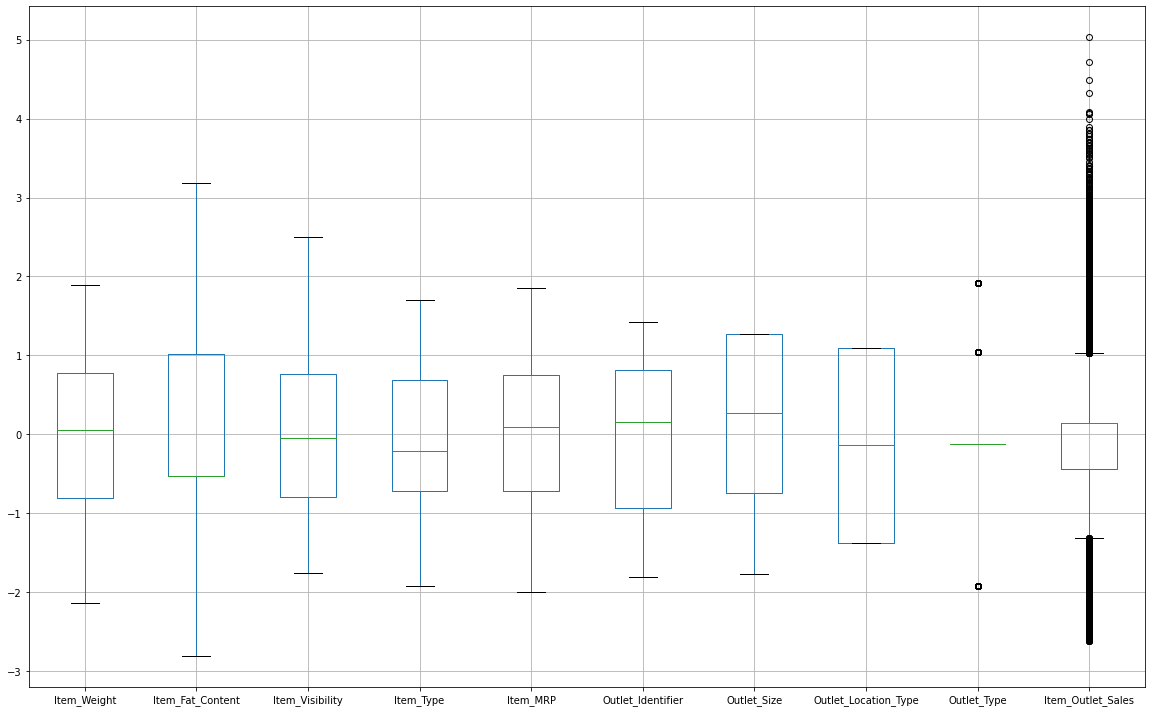

In [35]:
# Checking Outliers in data
# Plot boxplot
bigmart1.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [36]:
from scipy.stats import zscore
z=np.abs(zscore(bigmart1))
z.shape

(14204, 10)

In [37]:
threshold=2.5
print(np.where(z>2.5))

(array([   43,    45,    65,    81,   121,   130,   132,   145,   151,
         175,   178,   199,   203,   207,   210,   219,   238,   240,
         243,   255,   275,   276,   304,   333,   337,   339,   373,
         389,   396,   402,   405,   415,   424,   430,   439,   446,
         455,   456,   472,   481,   489,   489,   497,   504,   507,
         524,   540,   551,   574,   589,   610,   615,   621,   640,
         641,   661,   677,   694,   727,   753,   753,   805,   809,
         828,   838,   844,   851,   891,   905,   906,   915,   920,
         935,   946,   948,   991,   997,  1003,  1009,  1010,  1012,
        1021,  1034,  1043,  1051,  1086,  1090,  1092,  1104,  1113,
        1116,  1118,  1124,  1127,  1133,  1138,  1179,  1183,  1209,
        1254,  1278,  1286,  1305,  1321,  1335,  1348,  1372,  1393,
        1393,  1403,  1433,  1445,  1450,  1460,  1506,  1512,  1542,
        1549,  1551,  1565,  1576,  1589,  1601,  1611,  1615,  1617,
        1627,  1632

In [38]:
bigmart_new=bigmart1[(z<2.5).all(axis=1)]
print(bigmart1.shape)
print(bigmart_new.shape)

(14204, 10)
(13231, 10)


In [39]:
# % data loss
loss_percent=(14204-13231)/14204*100
print(loss_percent)

6.850183047029006


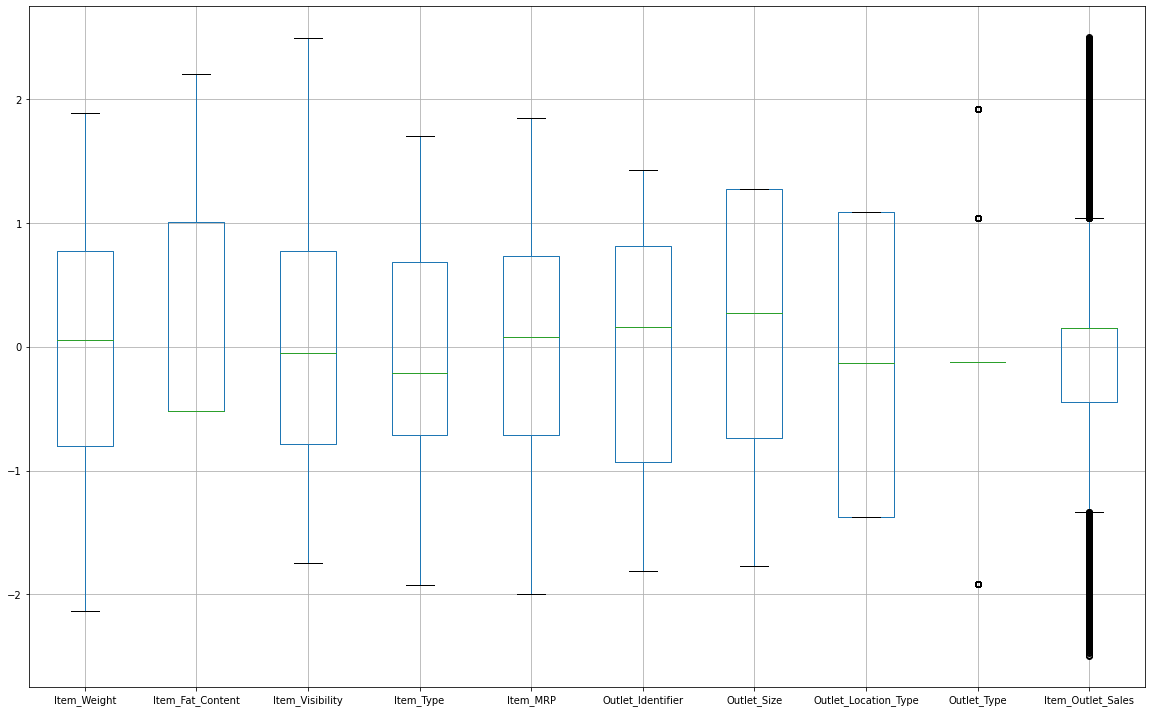

In [40]:
# Plot boxplot - To Check outliers 
bigmart_new.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [41]:
x=bigmart_new.drop('Item_Outlet_Sales',axis=1)
y=bigmart_new['Item_Outlet_Sales']

In [42]:
# Training process
# Min-max scaler
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [43]:
for i in range(0,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
        lr.fit(x_train,y_train) # Fitting the data will train the model
        pred_train=lr.predict(x_train) # Predicting the data # Predicted traget variable
        pred_test=lr.predict(x_test)
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_train,pred_train)}')
        print(f'At Random State {i}, the training accuracy is :- {r2_score(y_test,pred_test)}')
        print("\n")

At Random State 0, the training accuracy is :- 0.314669688566804
At Random State 0, the training accuracy is :- 0.31592768616695166


At Random State 1, the training accuracy is :- 0.31764625087707876
At Random State 1, the training accuracy is :- 0.30400886348844414


At Random State 2, the training accuracy is :- 0.3164065564951253
At Random State 2, the training accuracy is :- 0.31007898270489287


At Random State 3, the training accuracy is :- 0.31201880596948217
At Random State 3, the training accuracy is :- 0.32683404109035097


At Random State 4, the training accuracy is :- 0.3155681746792728
At Random State 4, the training accuracy is :- 0.31282156635091196


At Random State 5, the training accuracy is :- 0.31392108429593923
At Random State 5, the training accuracy is :- 0.31974176444852875


At Random State 6, the training accuracy is :- 0.31592878064441965
At Random State 6, the training accuracy is :- 0.31150097251631403


At Random State 7, the training accuracy is :- 0.312

In [44]:
# Check Overfitting - Use Cross Validation Score

In [45]:
# Cross Validation
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f'At cross fold {j} the cv score is  {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}')
    print('\n')

At cross fold 2 the cv score is  -1.0335638968349237 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fold 3 the cv score is  -3.134582333040603e+32 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fold 4 the cv score is  -1.878644996062583e+32 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fold 5 the cv score is  -2.5676817523682176e+32 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fold 6 the cv score is  -1.968968664278948e+32 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fold 7 the cv score is  -1.6144952804119343e+32 and accuracy score for training is 0.3127149266586825 and accuracy score for testing is 0.3233528169221602


At cross fo

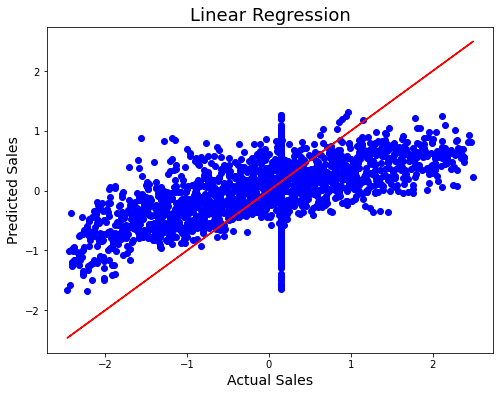

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='blue')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

In [47]:
# Regularization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,20))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [48]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

-1.9435272241796753e-05

In [49]:
cv_score=cross_val_score(ls,x,y,cv=3)
cv_mean=cv_score.mean()
cv_mean*100

-3.2600347734003634e+33

In [50]:
# Ensemble Technique
from sklearn.ensemble import AdaBoostRegressor
AD = AdaBoostRegressor()
AD.fit(x_train,y_train)
AD.score(x_test,y_test)

0.3522028362017381

In [51]:
# Pickeling of file or serialization of a file
import pickle
filename='BigDataMart.pkl'
pickle.dump(AD,open(filename,'wb'))

In [52]:
Model=pickle.load(open('BigDataMart.pkl','rb'))
result=Model.score(x_test,y_test)
print(result)

0.3522028362017381


In [53]:
# Conclusion:
Data=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_1=pd.DataFrame({'original':Data,'predicted':predicted},index=range(len(Data)))
df_1

,original,predicted
0,-0.207100,0.550757
1,0.149143,-0.174629
2,0.149143,-0.677709
3,0.960985,0.386473
4,0.149143,0.822840
...,...,...
2642,-1.523389,-0.655212
2643,-0.419935,0.476906
2644,0.149143,0.542800
2645,0.149143,-0.088025


# Thank You...!